In [1]:
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import community
import pickle
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 



## Step1: Load the data and visualization

In [2]:
with open('Network_LCC.pkl', 'rb') as fp:
    Network = pickle.load(fp)

In [150]:
G=Network['2018-01-27']

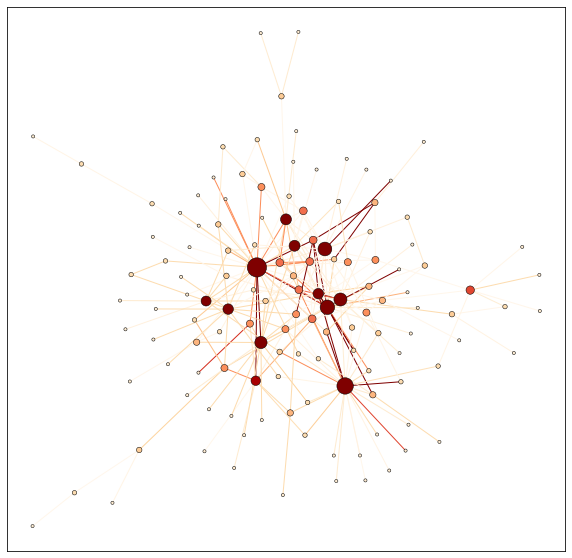

In [151]:
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

In [152]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):

    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
            

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


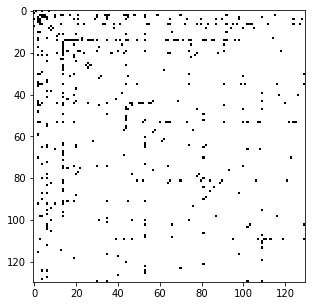

In [153]:
draw_adjacency_matrix(G)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/1152433118.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


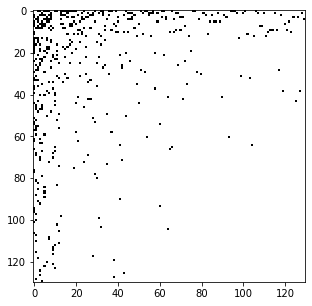

In [154]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [155]:
adjacency_matrix = nx.to_numpy_array(G,weight=None)

## Step2: Function for NODF

In [ ]:
def NODF(M):
    '''
    function to calculate the nestedness by overlap and decreasing fill (NODF).
    Metric developed by Almeida-Neto et al., 2008.

    Inputs:
    ----------
        M: array
            An matrix to which I want to calculate the NODF
    
    output:
    ----------
    NODF: number
        The NODF score for the whole matrix
    '''
    rw,cl=M.shape
    colN=np.zeros((cl,cl))
    rowN=np.zeros((rw,rw))
    
    #Find NODF column score
    for i in range(cl-1): # at a left position with respect to column j
      	for j in range(i+1,cl):
              #if (i!=j):
            if (np.sum(M[:,i])>np.sum(M[:,j]))&(np.sum(M[:,j])>0): # DF =! to zero, then NP =! to zero
                colN[i,j]=(M[:,i]*M[:,j]).sum()/(np.sum(M[:,j]))
    
#    NODF_COL = (2*np.sum(colN)/(cl*(cl-1)))*100
    
    #Find NODF row score
    for i in range(rw-1): #at an upper position with respect to row j
        for j in range(i+1,rw):
            #if (i!=j):
            if (np.sum(M[i,:])>np.sum(M[j,:]))&(np.sum(M[j,:])>0): # DF =! to zero, then NP =! to zero
                rowN[i,j]=(M[i,:]*M[j,:]).sum()/(np.sum(M[j,:]))
    
#    NODF_ROW = (2*np.sum(rowN)/(rw*(rw-1)))*100
    
    #Find NODF
    NODF=(2*(np.sum(rowN)+np.sum(colN))/(cl*(cl-1) + rw*(rw-1) ))
    return  NODF

In [ ]:
NODF_small={}
for day in ['2018-01-12','2018-01-14','2018-01-15','2018-01-16','2018-01-17',
            '2018-01-18','2018-01-19','2018-01-20','2018-01-21','2018-01-22','2018-01-23','2018-01-24',
            '2018-01-25','2018-01-26','2018-01-27','2018-01-28','2018-01-29','2018-01-30','2018-01-31', 
            '2018-02-01','2018-02-02','2018-02-03','2018-02-04','2018-02-05','2018-02-06','2018-02-07',
            '2018-02-08','2018-02-09','2018-02-10','2018-02-11','2018-02-12','2018-02-13','2018-02-14',
            '2018-02-15','2018-02-16','2018-02-17','2018-02-18','2018-02-19','2018-02-20','2018-02-21',
            '2018-02-22','2018-02-23','2018-02-24','2018-02-25','2018-02-26','2018-02-27','2018-02-28',
            '2018-03-01', '2018-03-02','2018-03-05','2018-03-20','2018-04-01']:
    G=Network[day]
    adjacency_matrix = nx.to_numpy_array(G,weight=None)
    NODF_small[day]=NODF_naive(adjacency_matrix)

In [ ]:
plt.plot(NODF_small.values())

## Step3: Generate NUll models:

The idea in this part is generating three kinds of null model (EE, FF, PP) and store them for NODF IBN Q.

In [62]:
def Visual_Graph(G):
#    pos =nx.spring_layout(G, k=0.15)
    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
    #pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
    d = dict(G.degree)
    plt.figure(3,figsize=(10,10)) 
    nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
    nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)
    
    plt.show()

In [ ]:
def EE_null(n_nodes,n_links):
    # EE model - Erdos Renyi - random, random
    G_EE=nx.gnm_random_graph(n_nodes, n_links, seed=None, directed=False)
    
    return G_EE

In [ ]:
def FF_null(G): 
    # FF model - fix degree sequnce
    G_FF = nx.configuration_model(dict(G.degree()).values())
    
    return G_FF

In [ ]:
def PP_null(P):    
    adjacency = np.random.rand(*P.shape) <= P
    G_PP = nx.from_numpy_matrix(adjacency, nx.DiGraph) 
    
    return G_PP

In [ ]:
def Make_Null_Model(G):
    # basic count for the network
    adjacency_matrix = nx.to_numpy_array(G,weight=None)
    degree_arr=sum(adjacency_matrix)
    n_nodes=len(degree_arr)
    n_links=sum(degree_arr)/2
    
    degree_arr_T=degree_arr.reshape(N, 1)
    degree_arr_=degree_arr.reshape(1, N)
    link_mat=np.dot(degree_arr_T,degree_arr_)
    P=link_mat/n_links
    
    G_EE=EE_null(n_nodes,n_links)
    G_FF=FF_null(G) 
    G_PP=PP_null(P) 
    
    return G_EE, G_FF, G_PP
    

In [157]:
adjacency_matrix

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
degree_arr=sum(adjacency_matrix)
N=len(degree_arr)

In [178]:
N

130

In [159]:
n_links=sum(degree_arr)/2

In [160]:
n_links

231.0

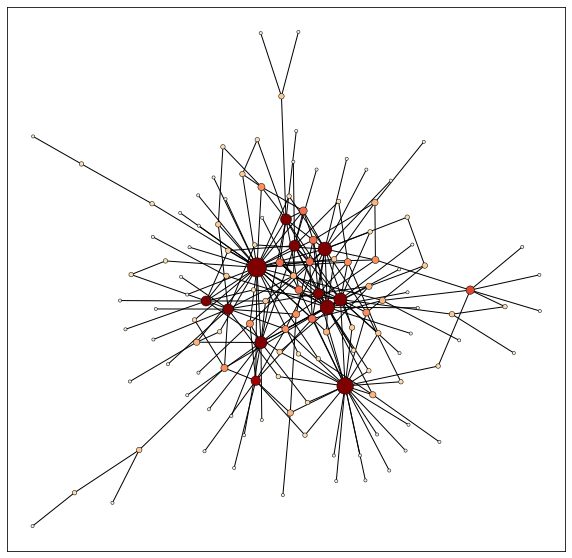

In [156]:
Visual_Graph(G)

In [19]:
# EE model - Erdos Renyi

In [224]:
n=len(G)
#p=n_links*2/(n*(n-1))
p=n_links*2/(n*(n-1))
G1=nx.fast_gnp_random_graph(n,p)

In [234]:
G11=nx.gnm_random_graph(n, n_links, seed=None, directed=False)

In [225]:
adjacency_matrix1 = nx.to_numpy_array(G1,weight=None)

In [226]:
adjacency_matrix1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
degree_arr1=sum(adjacency_matrix1)
N1=len(degree_arr1)
n_links1=sum(degree_arr1)/2

In [228]:
n_links1

228.0

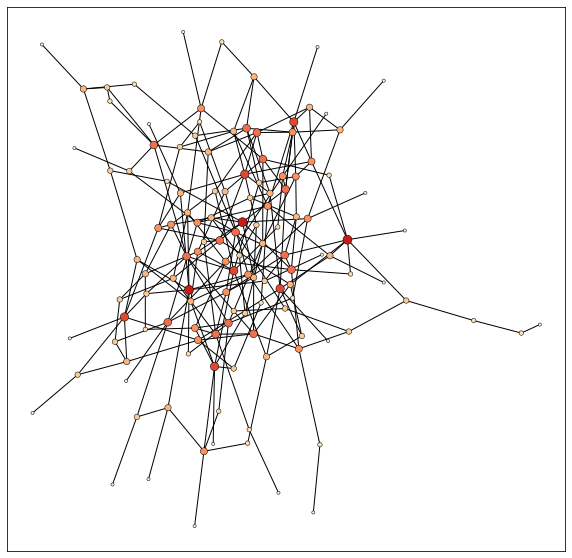

In [235]:
Visual_Graph(G11)

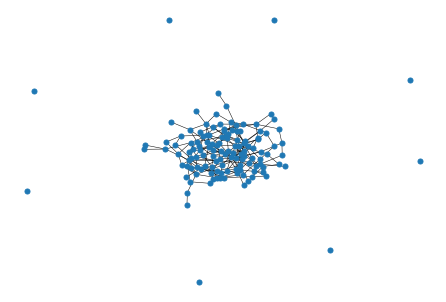

In [208]:
nx.draw(G1, pos=nx.spring_layout(G1,k=0.1), node_size=25, width=0.5, with_labels=False)

In [209]:
# FF model - fix degree sequnce

In [175]:
G2 = nx.configuration_model(dict(G.degree()).values())

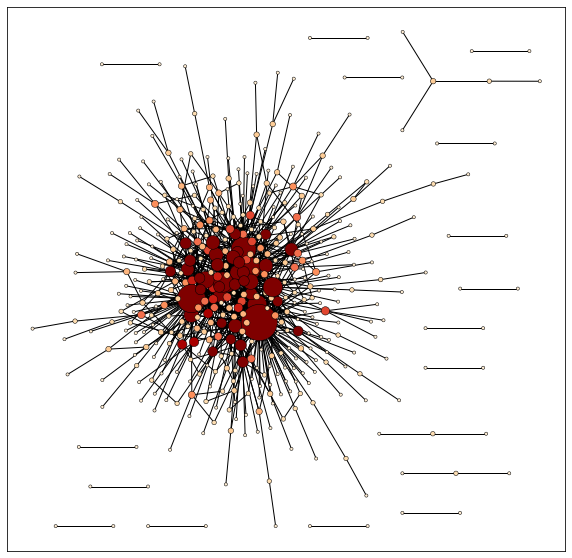

In [176]:
Visual_Graph(G3)

In [ ]:
# PP model

In [202]:
degree_arr_T=degree_arr.reshape(N, 1)
degree_arr_=degree_arr.reshape(1, N)
link_mat=np.dot(degree_arr_T,degree_arr_)
n_links=sum(degree_arr)/2
P=link_mat/n_links

In [203]:
adjacency = np.random.rand(*P.shape) <= P

In [204]:
graph = nx.from_numpy_matrix(adjacency, nx.DiGraph) 

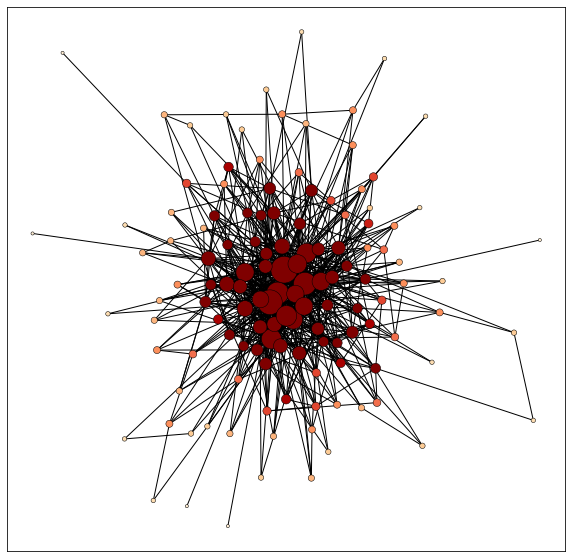

In [205]:
Visual_Graph(graph)

In [ ]:
# EP & PE MODEL

In [ ]:
degree_arr=sum(adjacency_matrix)
N=len(degree_arr)
degree_arr_T=degree_arr.reshape(N, 1)
degree_arr_=degree_arr.reshape(1, N)
link_mat=np.dot(degree_arr_T,degree_arr_)
n_links=sum(degree_arr)/2
P=link_mat/(n_links*n_links)

In [38]:
G_test=Network['2018-04-01']

In [ ]:
Visual_Graph(G_test):

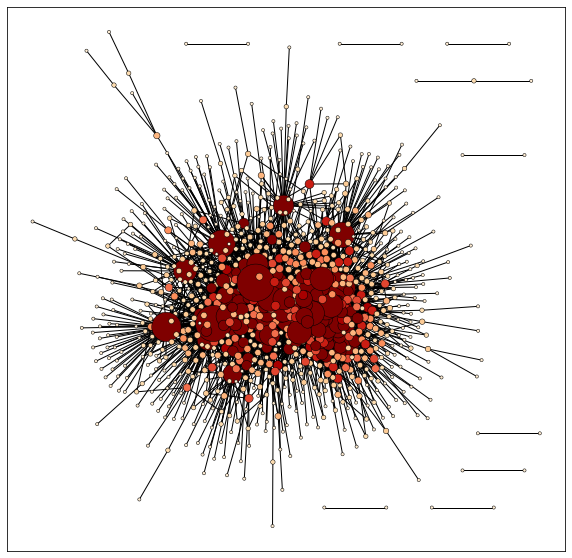

In [40]:
pos = nx.nx_agraph.graphviz_layout(G_test, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G_test.degree)
weights = nx.get_edge_attributes(G_test,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G_test,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G_test,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)


plt.show()

In [55]:
G = nx.configuration_model(dict(G_test.degree()).values())

In [44]:
G = nx.random_degree_sequence_graph(dict(G_test.degree()).values(), seed=42)
sorted(d for n, d in G.degree())

KeyboardInterrupt: 

In [48]:
G = nx.expected_degree_graph(dict(G_test.degree()).values())

In [52]:
G=nx.havel_hakimi_graph(dict(G_test.degree()).values(), create_using=None)

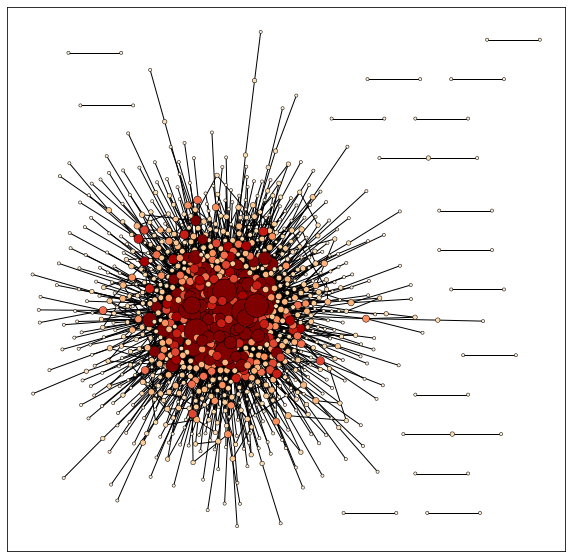

In [56]:
Visual_Graph(G)

In [46]:
def Visual_Graph(G):
    pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
    #pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
    d = dict(G.degree)
    weights = nx.get_edge_attributes(G,'weight')
    plt.figure(3,figsize=(10,10)) 
    nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
    nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_cmap=plt.cm.OrRd)

    plt.show()

In [54]:
 NODF(nx.to_numpy_array(G,weight=None))

0.011063295893985137

In [185]:
from scipy.special import comb
import numpy as np
from scipy.optimize import fsolve

def probability_eq(p):
    m = 130    # Number of nodes
    n =  m * (m - 1) / 2 # Number of possible links
    k = 231     # Number of successful linkages you want
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) - 1

# Use fsolve to find the probability p that satisfies the equation
solution = fsolve(probability_eq, 0.5)
exact_probability = solution[0]

print(f"The exact probability to get exactly 8 links is approximately {exact_probability:.5f}")

The exact probability to get exactly 8 links is approximately 0.50000


C:\Users\wyw25\AppData\Local\Temp/ipykernel_8148/2993650660.py:9: RuntimeWarning: invalid value encountered in multiply
  return comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) - 1
